# This program does the visualization and save the figures.

## Use the separately csv files of the county to manipulate the data.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
county = "Kaohsiung_City"
path = f"../data/processed/{county}.csv"

try:
    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
except FileNotFoundError:
    print("Can't find the county name.")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888497 entries, 0 to 888496
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       888484 non-null  datetime64[ns]
 1   sitename   888497 non-null  object        
 2   county     888497 non-null  object        
 3   aqi        882989 non-null  float64       
 4   pollutant  554629 non-null  object        
 5   status     853552 non-null  object        
 6   so2        870275 non-null  float64       
 7   co         874788 non-null  float64       
 8   o3         871187 non-null  float64       
 9   o3_8hr     879876 non-null  float64       
 10  pm10       868137 non-null  float64       
 11  pm2.5      857698 non-null  float64       
 12  no2        864147 non-null  float64       
 13  nox        863634 non-null  float64       
 14  no         863630 non-null  float64       
 15  windspeed  876380 non-null  float64       
 16  winddirec  875981 no

In [4]:
# Check all of sitename
df["sitename"].unique()

array(['Fuxing', 'Kaohsiung (Hunei)', 'Zuoying', 'Meinong', 'Qiaotou',
       'Renwu', 'Fengshan', 'Daliao', 'Linyuan', 'Nanzi', 'Qianjin',
       'Xiaogang', 'Qianzhen', 'Kaohsiung (Linyuan)', 'Hunei',
       'Kaohsiung (Alian)', 'Kaohsiung (Nanzi)', 'Kaohsiung (Zuoying)',
       'Nanzi Export Processing Zone'], dtype=object)

In [5]:
# We don't need the county name, drop it off.
df = df.drop(columns="county")

In [6]:
# Let's check the NaN first
df.isna().sum()

date             13
sitename          0
aqi            5508
pollutant    333868
status        34945
so2           18222
co            13709
o3            17310
o3_8hr         8621
pm10          20360
pm2.5         30799
no2           24350
nox           24863
no            24867
windspeed     12117
winddirec     12516
co_8hr         5695
pm2.5_avg      9986
pm10_avg      12261
so2_avg       95726
siteid       276055
dtype: int64

In [7]:
# We can make a copy avoiding changing the original data.
df_copy = df.copy()

In [8]:
# Set the time period and sitename
start_time = "2023-01-01"
end_time = "2023-12-31"
sitename = "Zuoying"

# Catch the data in the time period and matching sitename
df_plot = df_copy[(df_copy["date"] > start_time) & (df_copy["date"] < end_time)]
df_plot = df_plot[
    df_plot["sitename"] == sitename
    ]

# create a month column to save the month data
df_plot["month"] = df_plot["date"].dt.month
df_plot

,date,sitename,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg,siteid,month
76300,2023-12-30 23:00:00,Zuoying,95.0,PM2.5,Moderate,1.1,0.55,6.3,13.8,48.0,...,24.2,1.2,1.5,3.0,0.5,33.3,42.0,1.0,54.0,12
76314,2023-12-30 22:00:00,Zuoying,101.0,PM2.5,Unhealthy for Sensitive Groups,0.9,0.49,13.3,15.8,43.0,...,18.3,0.4,1.8,15.0,0.4,35.5,43.0,1.0,54.0,12
76333,2023-12-30 21:00:00,Zuoying,101.0,PM2.5,Unhealthy for Sensitive Groups,0.8,0.39,17.4,16.1,32.0,...,16.3,0.3,1.1,322.0,0.4,35.6,44.0,1.0,54.0,12
76340,2023-12-30 20:00:00,Zuoying,104.0,PM2.5,Unhealthy for Sensitive Groups,1.1,0.45,14.1,15.4,38.0,...,25.9,0.6,1.7,38.0,0.5,36.7,46.0,1.0,54.0,12
76352,2023-12-30 19:00:00,Zuoying,105.0,PM2.5,Unhealthy for Sensitive Groups,1.1,0.64,8.9,15.5,48.0,...,34.3,0.9,1.5,355.0,0.5,37.2,46.0,1.0,54.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188481,2023-01-01 05:00:00,Zuoying,86.0,PM2.5,Moderate,2.3,0.47,10.2,15.5,52.0,...,17.4,0.4,1.0,47.0,0.4,30.0,61.0,1.0,54.0,1
188491,2023-01-01 04:00:00,Zuoying,85.0,PM2.5,Moderate,2.0,0.50,11.0,17.5,55.0,...,18.0,0.3,1.2,15.0,0.4,29.0,64.0,1.0,54.0,1
188509,2023-01-01 03:00:00,Zuoying,84.0,PM2.5,Moderate,2.1,0.52,10.8,20.0,60.0,...,20.1,0.5,2.4,2.0,0.4,29.0,65.0,1.0,54.0,1
188517,2023-01-01 02:00:00,Zuoying,80.0,PM2.5,Moderate,1.8,0.49,11.3,22.4,63.0,...,20.4,0.4,2.0,4.0,0.4,27.0,64.0,1.0,54.0,1


Figure has been saved.


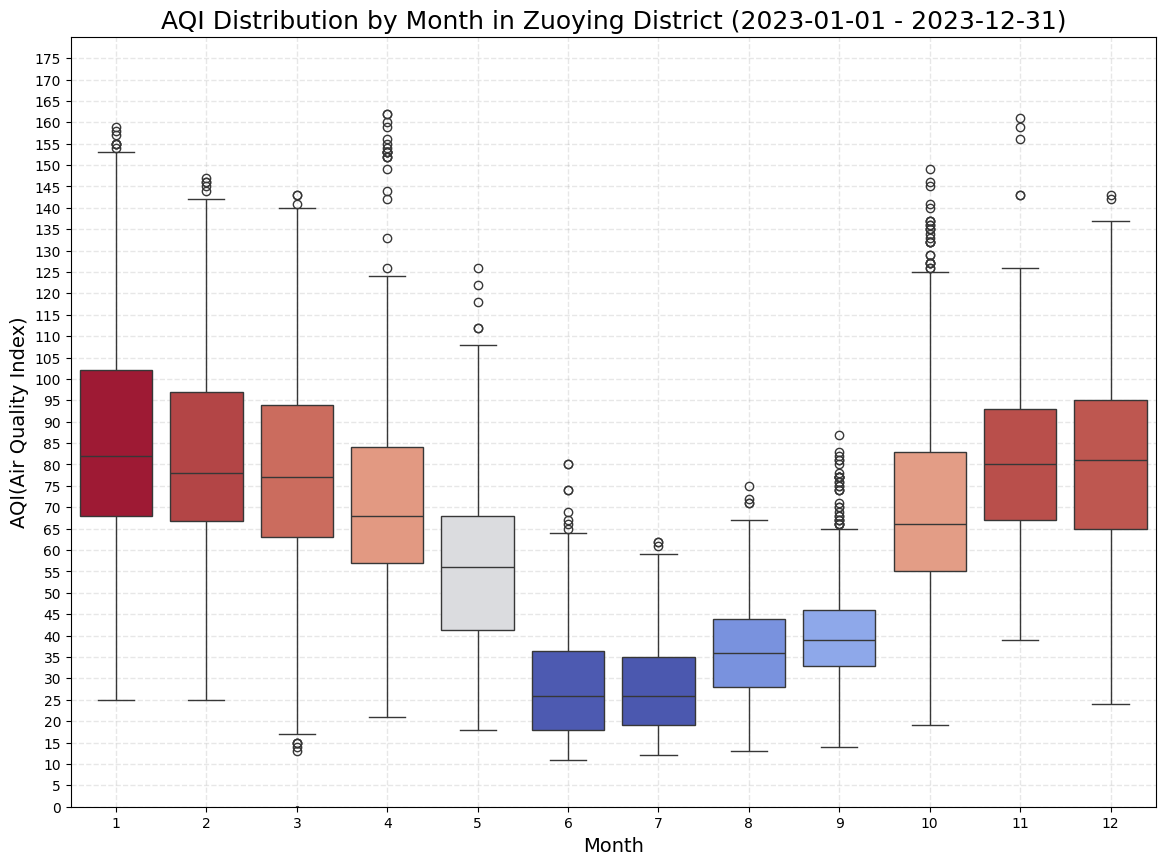

In [12]:
# Ascending the data via day
df_plot = df_plot.sort_values(by="month", ascending=True)

# Build the color corresponding to the aqi
y_label = "aqi"
df_mean = df_plot.groupby("month", as_index=False)[y_label].mean()

# Normalize will standardize the column value between 0 to 1
norm = plt.Normalize(df_mean[y_label].min(), df_mean[y_label].max())

# as_cmap makes the sns palette to colormap
colors = sns.color_palette("coolwarm", as_cmap=True)(norm(df_mean[y_label]))

# Draw the Boxplot
plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=df_plot,
    x="month",
    y=y_label,
    # dict create a "day" -> color form
    palette=dict(zip(df_mean["month"], colors)),
    hue="month",
    legend=False,
)
plt.xticks()
plt.xlabel("Month", fontsize=14)
plt.ylabel("AQI(Air Quality Index)", fontsize=14)
plt.ylim((0, 180))
plt.yticks(np.arange(0, 180, 5))
plt.title(f"AQI Distribution by Month in Zuoying District ({start_time} - {end_time})", fontsize=18)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# Save figure
path = f"../figure/{county}_{sitename}_{y_label}_{start_time}_month.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")
print("Figure has been saved.")

# show method must stand at the last position
plt.show()